In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [39]:
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


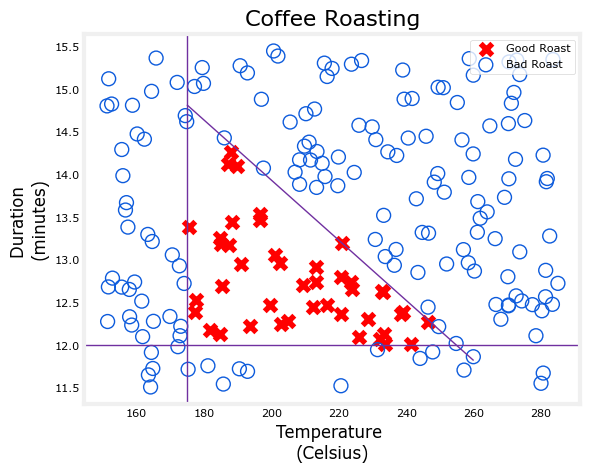

In [40]:
plt_roast(X,Y)

In [41]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

norm_1 = tf.keras.layers.Normalization(axis = 1)
norm_1.adapt(X) # Learns mean and variance
Xn = norm_1(X)

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")


Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


--- Tile/copy our data to increase the training set size and reduce the number of training epochs


In [42]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [43]:
tf.random.set_seed(1234) # applied to achieve consistent results
model = Sequential([
    tf.keras.Input(shape = (2,)),
    Dense(3, activation = "sigmoid", name = "layer1"),
    Dense(1, activation = "sigmoid", name = "layer2")
])

Note 1: The tf.keras.Input(shape=(2,)), specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point. This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the model.fit statement.

Note 2: Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability. This will be described in more detail in a later lab.

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:


L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )



L1 params =  9 , L2 params =  4


In [27]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.48  0.46 -0.3 ]
 [ 0.49  0.84  0.35]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.2 ]
 [-0.71]
 [ 0.96]] 
b2(1,): [0.]


In [31]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
)

model.fit(
    Xt, Yt,
    epochs = 10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0072
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0051
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0037
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0026
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0019
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0014
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0011
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 8.3769e-04
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 6.5040e-04
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 5.1039e-04


In [29]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-9.18e-03  1.45e+01  1.28e+01]
 [-9.03e+00  1.21e+01  2.86e-01]] 
b1: [-11.3    1.83  13.45]
W2:
 [[-46.8 ]
 [-44.  ]
 [ 39.72]] 
b2: [-12.81]


In [30]:


W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])



In [33]:
X_test = np.array([
    [200,13.9],
    [200,17]])
X_testn = norm_1(X_test)
predictions = model.predict(X_testn)
print("Predictions = \n", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predictions = 
 [[9.95e-01]
 [1.50e-08]]


In [35]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i]>= 0.5:
        yhat[i] = 1
    else:
        yhat[i] =0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [36]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


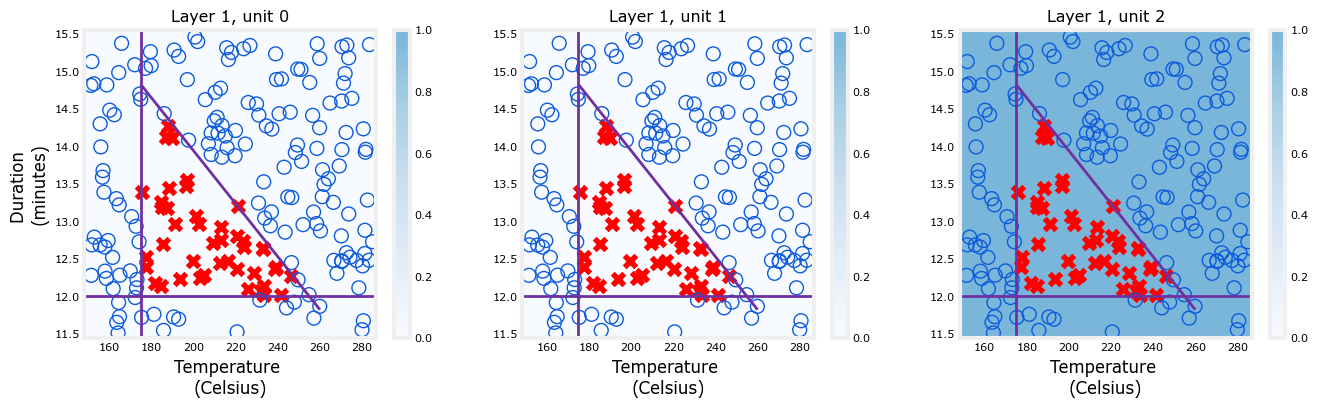

In [51]:

plt_layer(X,Y.reshape(-1,),W1,b1,norm_1)



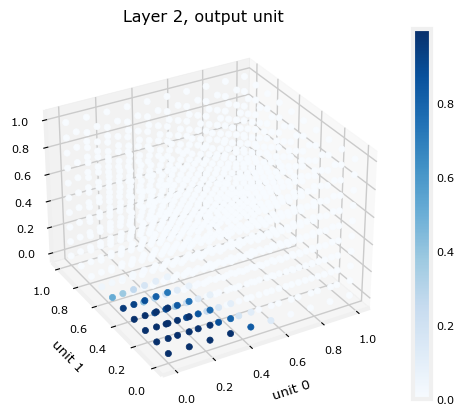

In [54]:


plt_output_unit(W2,b2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

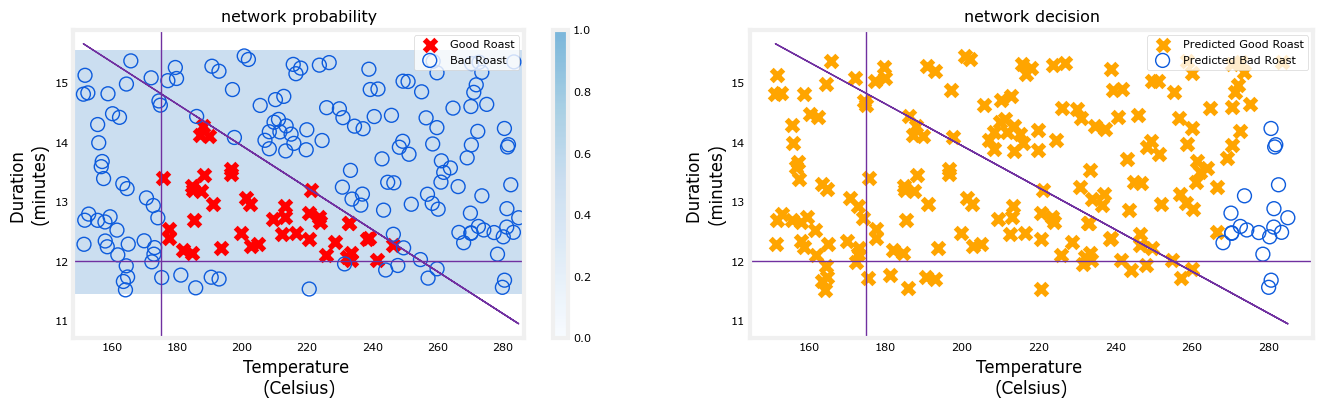

In [56]:
netf= lambda x : model.predict(norm_1(x))
plt_network(X,Y,netf)